# Here we get an estimation on the time variation of the field moments

## Get the field data

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/field_info/'
sys.path.append(path)
from field_grid import *
from format_field import get_field_df

In [3]:
#Point to the data and get the df
path='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/field_info/data/'
# file = "60Hr_Average_Comparison_all_3956_3997_norescut.txt"
file = "60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.txt"
file = path + file
df_field = get_field_df(file)

## Plot the moments

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


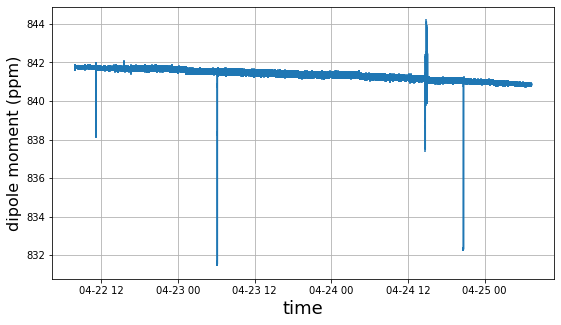

In [4]:
#plot the dipole moment alone
fig = plt.figure(figsize=(9,5))
plt.errorbar(df_field.index, df_field['D'], yerr=df_field['eD'])
plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('dipole moment (ppm)', fontsize=16)
plt.show()



/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


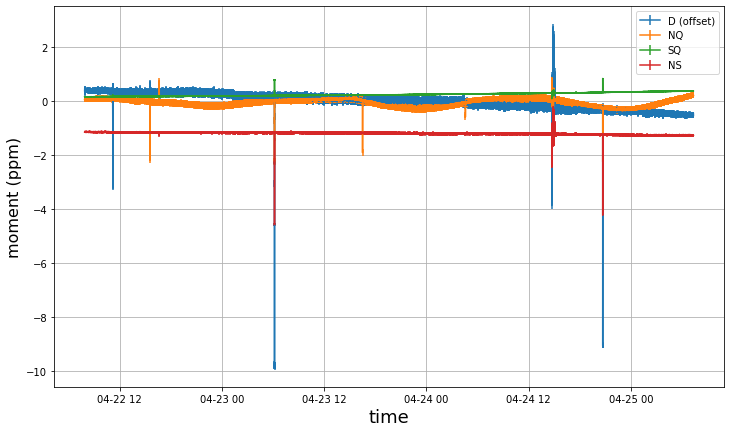

In [5]:
#for plotting together, subtract the dipole average from the dipole
mean = df_field['D'].mean()
df_field['Doff'] = df_field['D'] - mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df_field.index, df_field['Doff'], 
             yerr=df_field['eD'], label='D (offset)')
plt.errorbar(df_field.index, df_field['NQ'], 
             yerr=df_field['eNQ'], label='NQ')
plt.errorbar(df_field.index, df_field['SQ'],
             yerr=df_field['eSQ'], label='SQ')
plt.errorbar(df_field.index, df_field['NS'], 
             yerr=df_field['eNS'], label='NS')
plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()
plt.show()

## Get basic statistics of the moments and their errors and plot their hists

In [6]:
#First, the calculations
D_rms = df_field["D"].std()
eD_mean = df_field["eD"].mean()
NQ_rms = df_field["NQ"].std()
eNQ_mean = df_field["eNQ"].mean()
SQ_rms = df_field["SQ"].std()
eSQ_mean = df_field["eSQ"].mean()
NS_rms = df_field["NS"].std()
eNS_mean = df_field["eSQ"].mean()

total_moment_rms = np.sqrt(np.power(D_rms,2) + 
                    np.power(NQ_rms,2) + 
                    np.power(SQ_rms,2) +
                    np.power(NS_rms,2))

total_error_mean = np.sqrt(np.power(eD_mean,2) + 
                    np.power(eNQ_mean,2) + 
                    np.power(eSQ_mean,2) +
                    np.power(eNS_mean,2))

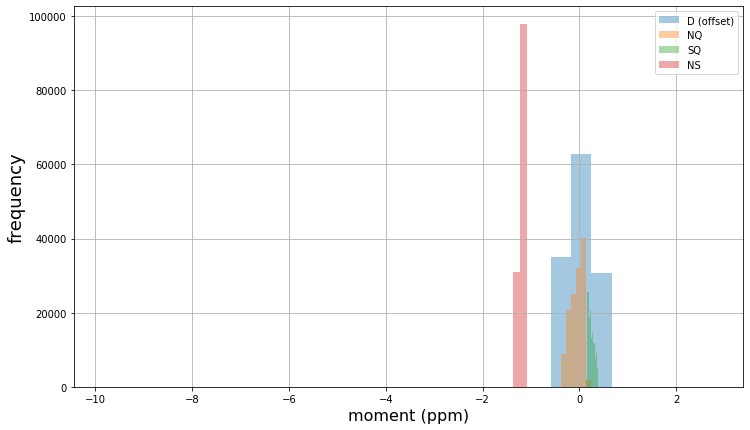

D_rms = 280 ppb
NQ_rms = 131 ppb
SQ_rms = 61 ppb
NS_rms = 46 ppb
There is a "total" spread in the moments of 319 ppb


In [7]:
#hist the moments together
a = 0.4
bins = 30
fig = plt.figure(figsize=(12,7))
plt.hist(df_field['Doff'], label='D (offset)',bins=bins,alpha=a)
plt.hist(df_field['NQ'], label='NQ',bins=bins,alpha=a)
plt.hist(df_field['SQ'], label='SQ',bins=bins,alpha=a)
plt.hist(df_field['NS'], label='NS',bins=bins,alpha=a)
plt.grid()
plt.xlabel('moment (ppm)', fontsize=16)
plt.ylabel('frequency', fontsize=18)
plt.legend()
plt.show()

print('D_rms = '+str(int(D_rms*1000))+' ppb')
print('NQ_rms = '+str(int(NQ_rms*1000))+' ppb')
print('SQ_rms = '+str(int(SQ_rms*1000))+' ppb')
print('NS_rms = '+str(int(NS_rms*1000))+' ppb')

print('There is a "total" spread in the moments of '
      +str(int(total_moment_rms*1000))+' ppb')


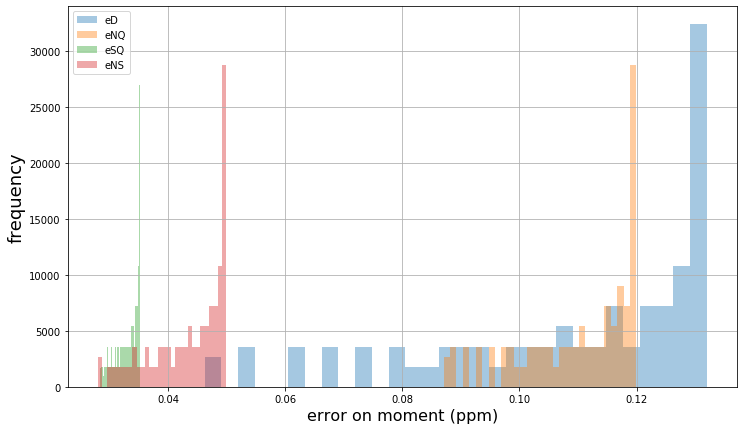

eD_mean = 108 ppb
eNQ_mean = 109 ppb
eSQ_mean = 33 ppb
eNS_mean = 33 ppb
There is a "total" average error in the moments of 161 ppb


In [8]:
#hist the error on the moments together
a = 0.4
bins = 30
fig = plt.figure(figsize=(12,7))
plt.hist(df_field['eD'], label='eD',bins=bins,alpha=a)
plt.hist(df_field['eNQ'], label='eNQ',bins=bins,alpha=a)
plt.hist(df_field['eSQ'], label='eSQ',bins=bins,alpha=a)
plt.hist(df_field['eNS'], label='eNS',bins=bins,alpha=a)
plt.grid()
plt.xlabel('error on moment (ppm)', fontsize=16)
plt.ylabel('frequency', fontsize=18)
plt.legend()
plt.show()

print('eD_mean = '+str(int(eD_mean*1000))+' ppb')
print('eNQ_mean = '+str(int(eNQ_mean*1000))+' ppb')
print('eSQ_mean = '+str(int(eSQ_mean*1000))+' ppb')
print('eNS_mean = '+str(int(eNS_mean*1000))+' ppb')
print('There is a "total" average error in the moments of '
      +str(int(total_error_mean*1000))+' ppb')